1. consider experimental nuclear masses in the file BEperNucleon.txt

In [1]:
import numpy as np
import csv
import numpy as np
# curve-fit() function imported from scipy
from scipy.optimize import curve_fit, minimize
 
from matplotlib import pyplot as plt

In [2]:

BEN = np.genfromtxt("BEperNucleon.txt", unpack = True, skip_header= 0)



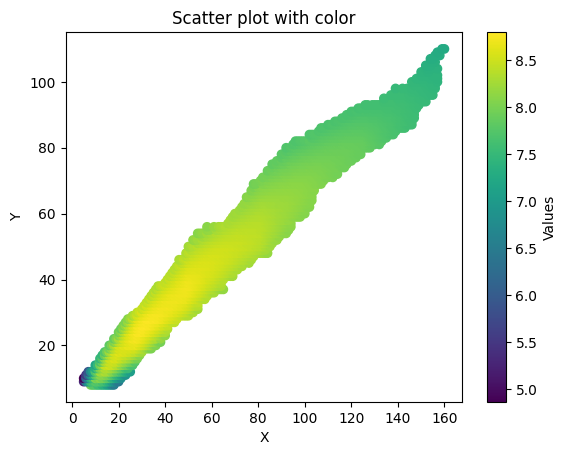

In [3]:
import matplotlib.pyplot as plt

# Sample data
x = BEN[0]
y = BEN[1]
values = BEN[2]  # Values to represent by color

#binding Energy 

BE = (BEN[0] + BEN[1]) * BEN[2] 

Nuc_info = (x,y)

plt.scatter(x, y, c=values, cmap='viridis')  # Use 'viridis' colormap for colors
plt.colorbar(label='Values')  # Add colorbar to show the scale
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot with color')

plt.show()

Take the LDM mass expression

\begin{equation}
B = a_{vol} \  A - a_{surf} \ A^{2/3} - a_{sym}  \ \frac{ ( N - Z)^2}{A} - a_c \ \frac{Z^2}{A^{1/3}} - \delta (A)
\end{equation}

wher $\delta (A)$ is 0 for even-even nuclei, $\frac{-a_p}{\sqrt{A}}$ for odd - A nuclei, 

## 3 Use chi-square approach to determine LDM parameters

In [4]:

def B(N, Z,a_vol, a_surf, a_sym, a_c, a_p):
    A = N + Z

    arg1 = a_vol * A
    arg2 = -a_surf * (A**(2/3))
    arg3 = -a_sym *(1/A) *(N - Z)**2
    arg4 = -a_c * (Z**2)/(A**(1/3))

    if  N % 2 == 0 and Z % 2 == 0: 
        arg5 = 0
    
    if  N % 2 != 0 and Z % 2 != 0:
        arg5 = - 2* a_p / np.sqrt(A)

    if  A % 2 != 0:
        arg5 = - a_p/ np.sqrt(A)


    return  arg1 + arg2 + arg3 + arg4 - arg5

#Curve fits
#popt, pcov = curve_fit(B, Nuc_info, values)

#print(popt)
#print(pcov)

In [5]:
parm = [1,1,1,1,1]

def chi_2(param):
    a_vol, a_surf, a_sym, a_c, a_p = param 

    B_theory = []

    for i in range(len(BEN[0])):
        test_value = B(  BEN[0][i], BEN[1][i] ,a_vol, a_surf, a_sym, a_c, a_p  )
        B_theory.append(test_value)

    return np.sum ((B_theory - BE)**2 )


result = minimize(chi_2,  parm)

#print(result)

a_vol, a_surf, a_sym, a_c, a_p = result.x

print("a_vol  =", a_vol)
print("a_surf =", a_surf)
print("a_sym  =", a_sym)
print("a_c    =", a_c)
print("a_p    =", a_p)

a_vol  = 15.348854756714049
a_surf = 16.21841364559059
a_sym  = 22.648503117025356
a_c    = 0.6928323790963916
a_p    = -13.601412571410657


Text(0.5, 1.0, 'Scatter plot with color')

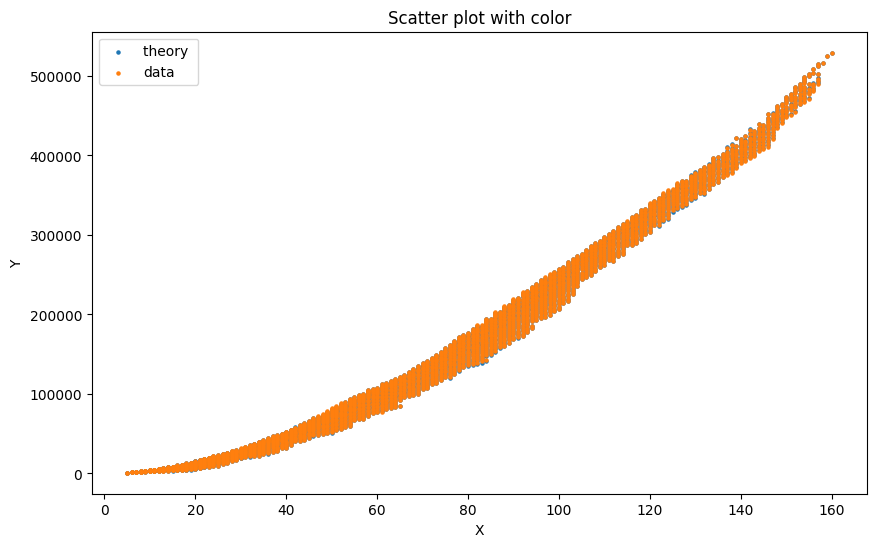

In [6]:
a_vol, a_surf, a_sym, a_c, a_p = result.x

B_theory = []

for i in range(len(BEN[0])):
    test_value = B(  BEN[0][i], BEN[1][i] ,a_vol, a_surf, a_sym, a_c, a_p  )
    B_theory.append(test_value)

plt.figure(figsize=(10, 6))
plt.scatter( BEN[0] ,B_theory* (BEN[0] + BEN[1]) , label = "theory ", s = 5 )  # Use 'viridis' colormap for colors
plt.scatter(BEN[0] , BE* (BEN[0] + BEN[1]) , label = "data", s = 5 )
#plt.colorbar(label='Values')  # Add colorbar to show the scale
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Scatter plot with color')  

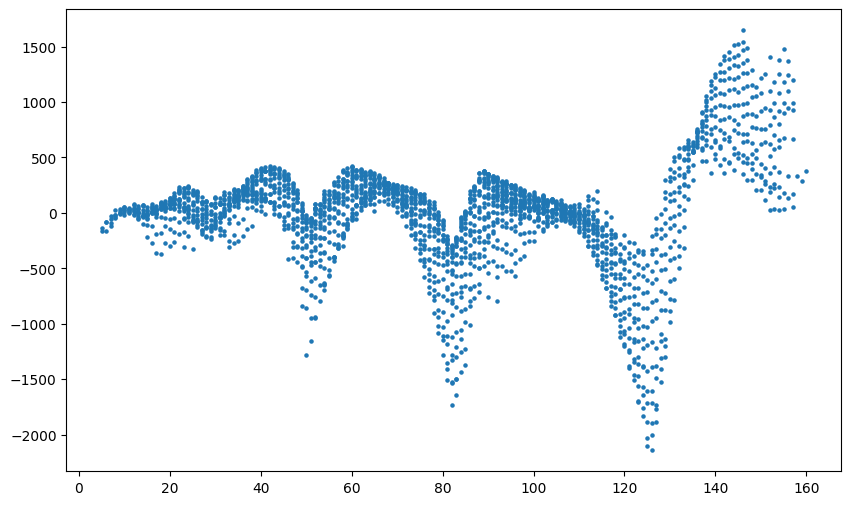

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter( BEN[0] , (B_theory -  BE)*(BEN[0] + BEN[1]) , label = "theory ", s = 5 )  # Use 'viridis' colormap for colors
#plt.xlim(20,60)


Magic Numberes apear before you 

## 4 Compute the Hessian and covariance matrices

In [8]:
print("Hessian")
hess = np.linalg.inv(result.hess_inv) * 1/2

print(hess)
print()
print()
print("Covarance Matrix")
N_d = len(BEN[0])
N_p = 5

s = result.fun/(N_d - N_p)

#print(s)
covar = result.hess_inv * s 
print(covar ) 

Hessian
[[ 7.26178542e+07 -1.29521055e+07 -2.25887682e+06 -3.96451881e+08
  -1.78817030e+04]
 [-1.29521055e+07  2.33524898e+06  3.97211887e+05  6.98376422e+07
   2.52720623e+03]
 [-2.25887682e+06  3.97211887e+05  8.46191867e+04  1.21569954e+07
   3.21144241e+02]
 [-3.96451881e+08  6.98376422e+07  1.21569954e+07  2.21019515e+09
   1.19777654e+05]
 [-1.78817030e+04  2.52720623e+03  3.21144241e+02  1.19777654e+05
   6.66861795e+01]]


Covarance Matrix
[[2.07171621e-03 6.79203716e-03 5.00041994e-03 1.27004470e-04
  4.59282834e-02]
 [6.79203716e-03 2.23137733e-02 1.63760697e-02 4.14963910e-04
  1.51443674e-01]
 [5.00041994e-03 1.63760697e-02 1.23682526e-02 3.05386700e-04
  1.12164518e-01]
 [1.27004470e-04 4.14963910e-04 3.05386700e-04 7.84124616e-06
  2.77535139e-03]
 [4.59282834e-02 1.51443674e-01 1.12164518e-01 2.77535139e-03
  1.12068916e+00]]


## 5 Compute the matrix of correlations between LDM parameters

In [9]:
co_m = np.corrcoef(covar)

print("Correlation Matrix")
print(co_m)

Correlation Matrix
[[1.         0.99999976 0.99999603 0.99999885 0.99992742]
 [0.99999976 1.         0.99999543 0.99999768 0.99993447]
 [0.99999603 0.99999543 1.         0.99999348 0.99993456]
 [0.99999885 0.99999768 0.99999348 1.         0.99990801]
 [0.99992742 0.99993447 0.99993456 0.99990801 1.        ]]


## 6 What is the effective number of LDM parameters?

1?  because the correlation matrix is ~1 for all correllation coefficent matrixs

## 7 Will the result be the same if the model is calibrated to the binding energy per nucleon B/A

yes i know because I did it wrong and first got the wrong constants and got the same results.

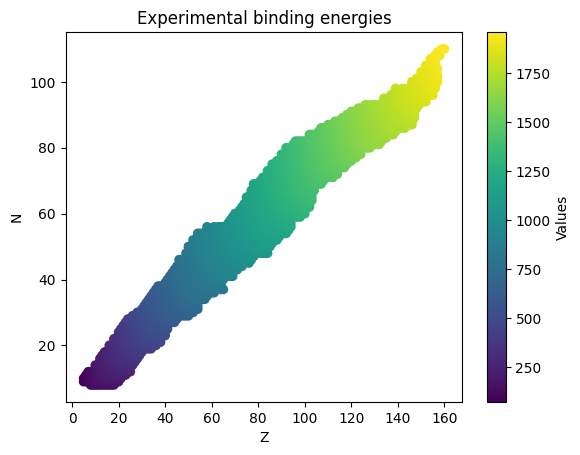

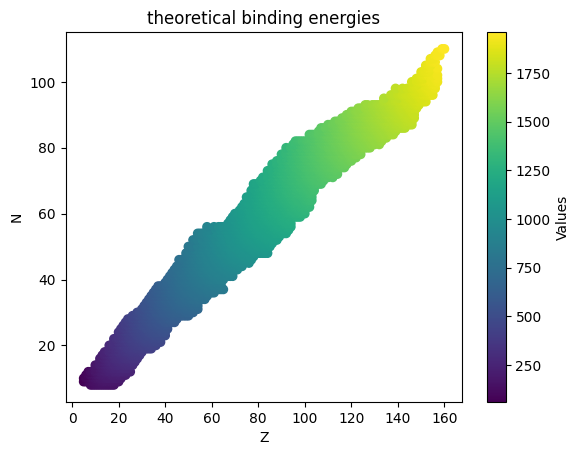

In [10]:
plt.scatter(x, y, c=BE, cmap='viridis')  # Use 'viridis' colormap for colors
plt.colorbar(label='Values')  # Add colorbar to show the scale
plt.xlabel('Z')
plt.ylabel('N')
plt.title('Experimental binding energies')

plt.show()
plt.scatter(x, y, c=B_theory, cmap='viridis')  # Use 'viridis' colormap for colors
plt.colorbar(label='Values')  # Add colorbar to show the scale
plt.xlabel('Z')
plt.ylabel('N')
plt.title('theoretical binding energies')

plt.show()